In [1]:
import numpy as np
import string
import matplotlib.pyplot as plt
from imutils import face_utils
import os, cv2, dlib

In [2]:
path = '../../thermal/Shane/Subject10323/10323Session4/'

In [3]:
detector = dlib.simple_object_detector(os.path.join("models/", "dlib_face_detector.svm"))
predictor = dlib.shape_predictor(os.path.join("models/", "dlib_landmark_predictor.dat"))

In [43]:
# trial = 0

noseTrialFull = []
for trial in range(295):
    print('Trial:', trial)
    
    timeStamp = np.load(path + 'timeStamp/timeStampBlocktrial' + str(trial) + '.npy')
    timeStamp =  timeStamp / 10000000
    totalFrames = timeStamp.shape[0] #int(1.05 * 65 * 20)
    collectedFrames = totalFrames - np.sum(timeStamp == 0)
    
    thermalImages = np.load(path + 'images/imagesBlocktrial' + str(trial) + '.npy')/ 10 - 100
    thermalImages = thermalImages.reshape(-1, 288, 382)

    print('Total images in trial:', collectedFrames)
    noseTrial = []
    for currentImage in range(collectedFrames):
        thermalImage = thermalImages[currentImage, :, :]
        min_temp = np.min(thermalImage)
        max_temp = np.max(thermalImage)

        normalized_thermal_image = ((thermalImage - min_temp) / (max_temp - min_temp) * 255).astype(np.uint8)       
        rects = detector(normalized_thermal_image, upsample_num_times=1)


        faceDetected = False
        facialLocalizations = []
        
        if rects:
#             print("dlib found face")
            faceDetected = True
            (x, y, w, h) = face_utils.rect_to_bb(rects[0])
            shape = predictor(normalized_thermal_image, rects[0])
            shape = face_utils.shape_to_np(shape)
            for i, (sx, sy) in enumerate(shape):
                # print(i, sx, sy, type(sx))
                coord = [int(sx), int(sy)]
                facialLocalizations.append(coord)
                # cv2.circle(normalized_thermal_image, coord, 2, (0, 255, 0), -1)  # -1 for a filled circle
            noseTip = facialLocalizations[30]
            noseTrial.append(thermalImage[noseTip[0],noseTip[1]])
                # for j,i in enumerate(facialLocalizations):
                #     plt.scatter(i[0],i[1])
                #     plt.annotate((j),(i[0],i[1]))

        else:
            print("dlib found no face")
    noseTrialFull.append(noseTrial)

        # cv2.imshow('Image with Points', normalized_thermal_image)
        # # plt.show()
        # if cv2.waitKey(1) == ord('q'):
        #     break
    
# cv2.destroyAllWindows()

Trial: 0
Total images in trial: 152
Trial: 1
Total images in trial: 153
Trial: 2
Total images in trial: 149
Trial: 3
Total images in trial: 219
Trial: 4
Total images in trial: 219
Trial: 5
Total images in trial: 149
Trial: 6
Total images in trial: 152
Trial: 7
Total images in trial: 150
Trial: 8
Total images in trial: 152
Trial: 9
Total images in trial: 215
Trial: 10
Total images in trial: 221
Trial: 11
Total images in trial: 149
Trial: 12
Total images in trial: 155
Trial: 13
Total images in trial: 148
Trial: 14
Total images in trial: 155
Trial: 15
Total images in trial: 149
Trial: 16
Total images in trial: 154
Trial: 17
Total images in trial: 150
Trial: 18
Total images in trial: 152
Trial: 19
Total images in trial: 152
Trial: 20
Total images in trial: 217
Trial: 21
Total images in trial: 215
Trial: 22
Total images in trial: 154
Trial: 23
Total images in trial: 150
Trial: 24
Total images in trial: 153
Trial: 25
Total images in trial: 151
Trial: 26
Total images in trial: 217
Trial: 27
T

KeyboardInterrupt: 

In [60]:
keepT = []
passT = []
for i in noseTrialFull:
    if len(i) < 160:
        keepT.append(i[:148])
    else:
        passT.append(i[:215])
keepT = np.array(keepT)
passT = np.array(passT)
keepT -= np.mean([np.mean(i) for i in noseTrialFull])
passT -= np.mean([np.mean(i) for i in noseTrialFull])

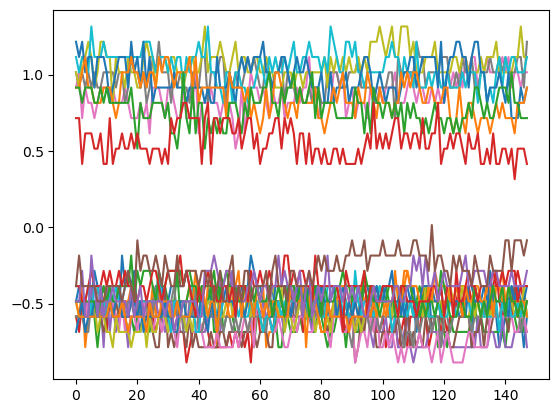

In [61]:
for i in keepT:
    plt.plot(i)

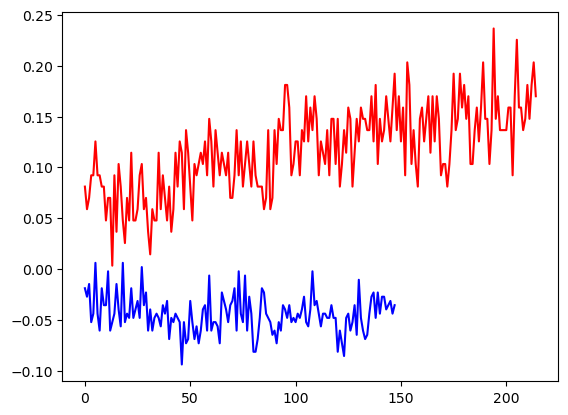

In [63]:
plt.plot(np.mean(keepT,axis = 0),color='blue')
plt.plot(np.mean(passT,axis = 0),color='red')

In [6]:
noseTip = facialLocalizations[30]
thermalImage[noseTip[0],noseTip[1]]

In [160]:

from scipy.ndimage import median_filter
    

In [64]:
import numpy as np
import string
import matplotlib.pyplot as plt
from imutils import face_utils
import os, cv2, dlib

In [65]:
path = '../../thermal/Shane/Subject10323/10323Session4/'

In [66]:
detector = dlib.simple_object_detector(os.path.join("models/", "dlib_face_detector.svm"))
predictor = dlib.shape_predictor(os.path.join("models/", "dlib_landmark_predictor.dat"))

In [223]:
keep_nose_roi_data = []
keep_forehead_roi_data = []
keep_left_cheek_roi_data = []
keep_right_cheek_roi_data = []

pass_nose_roi_data = []
pass_forehead_roi_data = []
pass_left_cheek_roi_data = []
pass_right_cheek_roi_data = []

full_nose_roi_data = []
full_forehead_roi_data = []
full_left_cheek_roi_data = []
full_right_cheek_roi_data = []

window_size = 30

# for nback task
# blocks = 10
# levels = 3

# for shanes thing?
numTrials = 295
# images = 145

# changed structure for shane
for trial in range(numTrials):
    title = 'Trial:' + str(trial)

    timeStamp = np.load(path + 'timeStamp/timeStampBlocktrial' + str(trial) + '.npy')
    timeStamp =  timeStamp / 10000000
    totalFrames = timeStamp.shape[0] #int(1.05 * 65 * 20)
    collectedFrames = totalFrames - np.sum(timeStamp == 0)
    # print(collectedFrames)
    thermalImages = np.load(path + 'images/imagesBlocktrial' + str(trial) + '.npy')/ 10 - 100
    thermalImages = thermalImages.reshape(-1, 288, 382)

    # collectedFrames = totalFrames - np.sum(timeStamp == 0)
    if collectedFrames < 160:
        images = 148
    elif collectedFrames < 230:
        images = 215
    
    left_brow = np.zeros([images, 2])
    right_brow = np.zeros([images, 2])
    nose_tip = np.zeros([images, 2])
    left_cheek = np.zeros([images, 2])
    right_cheek = np.zeros([images, 2])
    print(title)
    
    # timeStamp = np.load(path + str(trial) + '.npy')

    # timeStamp =  timeStamp / 10000000
    # totalFrames = timeStamp.shape[0] #int(1.05 * 65 * 20)
    # collectedFrames = totalFrames - np.sum(timeStamp == 0)
    

    print('Total images in trial:', collectedFrames)
    
    for currentImage in range(images):
        toply = 1000
        topry = 1000
        thermalImage = thermalImages[currentImage, :, :]
        min_temp = np.min(thermalImage)
        max_temp = np.max(thermalImage)

        normalized_thermal_image = ((thermalImage - min_temp) / (max_temp - min_temp) * 255).astype(np.uint8)       
        rects = detector(normalized_thermal_image, upsample_num_times=1)

        if rects:
            (x, y, w, h) = face_utils.rect_to_bb(rects[0])
            shape = predictor(normalized_thermal_image, rects[0])
            shape = face_utils.shape_to_np(shape)
            for i, (sx, sy) in enumerate(shape):
                coord = [int(sx), int(sy)]


                cv2.circle(normalized_thermal_image, coord, 2, (0, 255, 0), -1)  # -1 for a filled circle
                
                if i in [17,18,19,20,21, 22, 23,24,25,26,29,30]:
                    cv2.circle(normalized_thermal_image, coord, 2, (0, 0, 255), -1)
                    if i == 19:
                        lcx = int(sx)
                    elif i == 24:
                        rcx = int(sx)
                    # if i in [17,18,19,20,21]:
                    elif i == 21:
                        if int(sy) < toply:  
                            toply = int(sy)
                        left_brow[currentImage, :] = np.array(coord)
                        lx = int(sx)
                        ly = int(sy)
                            
                    # elif i in [22, 23 , 24 , 25 ,26]:
                    elif i == 22:
                        if int(sy) < topry: 
                            topry = int(sy)
                        right_brow[currentImage, :] = np.array(coord)
                        rx = int(sx)
                        ry = int(sy)
                            
                    elif i == 29:
                        nose_tip[currentImage, :] = np.array(coord)
                        nx = int(sx) - window_size // 2
                        ny = int(sy) - window_size // 2
                        c1 = (nx,ny)
                        c2 = (nx+window_size,ny+window_size)
                        cv2.rectangle(normalized_thermal_image,c1,c2,(0, 0, 255))
                        
                        bx = int((lx + rx) / 2) - window_size // 2
                        by = int((ly + ry) / 2) - window_size // 2
                        c1 = (bx,by)
                        c2 = (bx+window_size,by+window_size)
                        cv2.rectangle(normalized_thermal_image,c1,c2,(0, 0, 255))
                        
                else:
                    cv2.circle(normalized_thermal_image, (sx, sy), 2, (255, 255, 255), -1)
            # cv2.rectangle(normalized_thermal_image,(shape[5][0],shape[31][1]),(shape[48][0],shape[30][1]),(0, 0, 255))
            lchk = [int((shape[5][0] + shape[48][0])/2),int((shape[33][1] + shape[30][1])/2)]
            left_cheek[currentImage,:] = np.array(lchk)
            c1 = (lchk[0] - window_size//2, lchk[1] - window_size//2)
            c2 = (c1[0]+window_size, c1[1]+window_size)
            cv2.rectangle(normalized_thermal_image,c1,c2,(0, 0, 255))
            # cv2.rectangle(normalized_thermal_image,(shape[11][0],shape[31][1]),(shape[50][0],shape[30][1]),(0, 0, 255))
            rchk = [int((shape[11][0] + shape[50][0])/2),int((shape[33][1] + shape[30][1])/2)]
            right_cheek[currentImage,:] = np.array(rchk)
            c1 = (rchk[0] - window_size//2, rchk[1] - window_size//2)
            c2 = (c1[0]+window_size, c1[1]+window_size)
            cv2.rectangle(normalized_thermal_image,c1,c2,(0, 0, 255))
            
           
        else:
            print("dlib found no face")

        cv2.imshow('Image with Points', normalized_thermal_image)
        cv2.waitKey(1)
            
    # nose ROI
    nose_rois = []
    for i,point in enumerate(nose_tip):
        if not np.all(point == 0):  # Skip if the point is [0, 0], indicating no face found
            roi_x = int(point[0]) - window_size // 2
            roi_y = int(point[1]) - window_size // 2
            # Apply a 5x5 median filter to smooth the image
            smoothed_image = median_filter(thermalImages[i, :, :], size=(10, 10))
            roi = smoothed_image[roi_y:roi_y + window_size, roi_x:roi_x + window_size]
            # print(roi,thermalImages[i, roi_y:roi_y + window_size, roi_x:roi_x + window_size])
            # roi = thermalImages[i, roi_y:roi_y + window_size, roi_x:roi_x + window_size]
        else:
            roi = np.zeros((window_size, window_size))  # Placeholder for no face

        nose_rois.append(roi)

    nose_rois = np.array(nose_rois)
#     print("Extracted ROIs:", nose_rois.shape)
    nose_timeseries = nose_rois[:, :, :].mean(axis = (1, 2))

    # forehead ROI
    forehead_rois = []
    for i, (point1, point2) in enumerate(zip(left_brow, right_brow)):
        if (not np.all(point1 == 0)) and (not np.all(point2 == 0)):  # Skip if the point is [0, 0], indicating no face found
            roi_x = int((point1[0] + point2[0]) / 2) - window_size // 2
            roi_y = int((point1[1] + point2[1]) / 2) - window_size // 2
            # (left + right)/2 
            
            # Apply a 5x5 median filter to smooth the image
            smoothed_image = median_filter(thermalImages[i, :, :], size=(10, 10))
            roi = smoothed_image[roi_y:roi_y + window_size, roi_x:roi_x + window_size]
            # roi = thermalImages[i, roi_y:roi_y + window_size, roi_x:roi_x + window_size]

        else:
            roi = np.zeros((window_size, window_size))  # Placeholder for no face

        forehead_rois.append(roi)

    forehead_rois = np.array(forehead_rois)
#     print("Extracted ROIs:", forehead_rois.shape)
    forehead_timeseries = forehead_rois[:, :, :].mean(axis = (1, 2))    



    left_cheek_rois = []
    for i,point in enumerate(left_cheek):
        if not np.all(point == 0):  # Skip if the point is [0, 0], indicating no face found
            roi_x = int(point[0]) - window_size // 2
            roi_y = int(point[1]) - window_size // 2
            # Apply a 5x5 median filter to smooth the image
            smoothed_image = median_filter(thermalImages[i, :, :], size=(10, 10))
            roi = smoothed_image[roi_y:roi_y + window_size, roi_x:roi_x + window_size]
            # roi = thermalImages[i, roi_y:roi_y + window_size, roi_x:roi_x + window_size]
        else:
            roi = np.zeros((window_size, window_size))  # Placeholder for no face

        left_cheek_rois.append(roi)

    left_cheek_rois = np.array(left_cheek_rois)
#     print("Extracted ROIs:", nose_rois.shape)
    left_cheek_timeseries = left_cheek_rois[:, :, :].mean(axis = (1, 2))
    right_cheek_rois = []
    for i,point in enumerate(right_cheek):
        if not np.all(point == 0):  # Skip if the point is [0, 0], indicating no face found
            roi_x = int(point[0]) - window_size // 2
            roi_y = int(point[1]) - window_size // 2
            # Apply a 5x5 median filter to smooth the image
            smoothed_image = median_filter(thermalImages[i, :, :], size=(10, 10))
            roi = smoothed_image[roi_y:roi_y + window_size, roi_x:roi_x + window_size]
            # roi = thermalImages[i, roi_y:roi_y + window_size, roi_x:roi_x + window_size]
        else:
            roi = np.zeros((window_size, window_size))  # Placeholder for no face

        right_cheek_rois.append(roi)

    right_cheek_rois = np.array(right_cheek_rois)
#     print("Extracted ROIs:", nose_rois.shape)
    right_cheek_timeseries = right_cheek_rois[:, :, :].mean(axis = (1, 2))
    
    if images == 148:
        keep_nose_roi_data.append(nose_timeseries)
        keep_forehead_roi_data.append(forehead_timeseries)
        keep_left_cheek_roi_data.append(left_cheek_timeseries)
        keep_right_cheek_roi_data.append(right_cheek_timeseries)
    elif images == 215:
        pass_nose_roi_data.append(nose_timeseries)
        pass_forehead_roi_data.append(forehead_timeseries)
        pass_left_cheek_roi_data.append(left_cheek_timeseries)
        pass_right_cheek_roi_data.append(right_cheek_timeseries)
    full_nose_roi_data.append(nose_timeseries)
    full_forehead_roi_data.append(forehead_timeseries)
    full_left_cheek_roi_data.append(left_cheek_timeseries)
    full_right_cheek_roi_data.append(right_cheek_timeseries)


    plt.plot(nose_timeseries)
    plt.title(title + ' - Nose')
    plt.show()
    
    plt.plot(forehead_timeseries)
    plt.title(title + ' - Forehead')
    plt.show()

    plt.plot(left_cheek_timeseries,label='left')
    plt.plot(right_cheek_timeseries,label='right')
    plt.title(title + ' - Cheeks')
    
    plt.legend()
    plt.show()
    
cv2.destroyAllWindows()

Trial:0
Total images in trial: 152


KeyboardInterrupt: 

In [224]:
cv2.destroyAllWindows()    

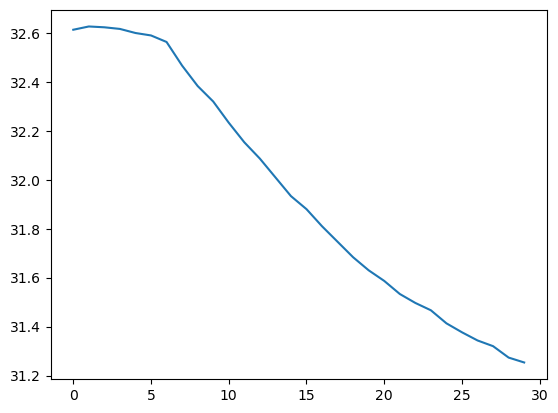

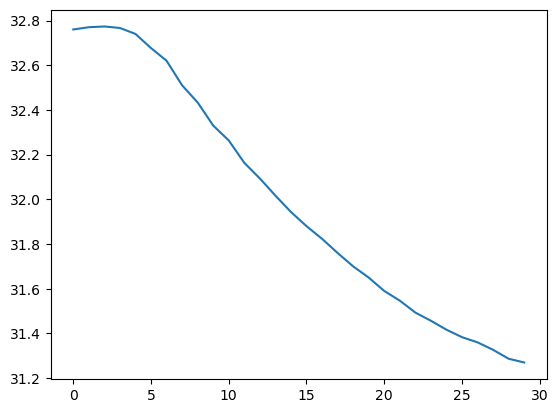

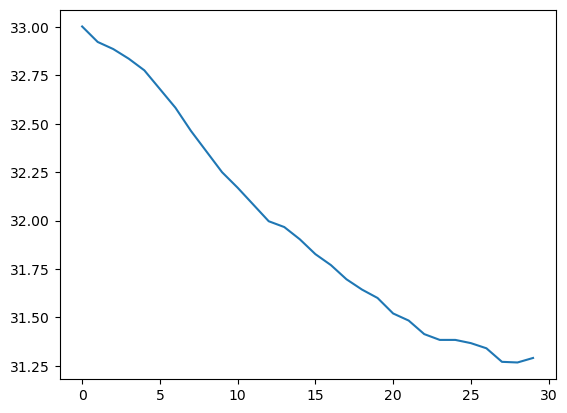

In [186]:
smoothed_image = median_filter(thermalImages[i, :, :], size=(15, 15))
plt.plot(np.mean(smoothed_image[roi_y:roi_y + window_size, roi_x:roi_x + window_size],axis=0))
plt.show()
smoothed_image = median_filter(thermalImages[i, :, :], size=(10, 10))
plt.plot(np.mean(smoothed_image[roi_y:roi_y + window_size, roi_x:roi_x + window_size],axis=0))
plt.show()
plt.plot(np.mean(thermalImages[i,roi_y:roi_y + window_size, roi_x:roi_x + window_size],axis=0))
plt.show()

In [184]:
(smoothed_image[roi_y:roi_y + window_size, roi_x:roi_x + window_size] == thermalImages[i, roi_y:roi_y + window_size, roi_x:roi_x + window_size]).sum()
smoothed_image[roi_y:roi_y + window_size, roi_x:roi_x + window_size].shape,thermalImages[i, roi_y:roi_y + window_size, roi_x:roi_x + window_size].shape
np.mean(thermalImages[roi_y:roi_y + window_size, roi_x:roi_x + window_size],axis=0).shape

(30, 382)

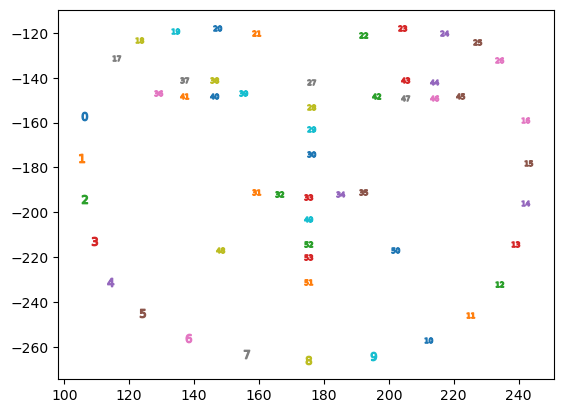

In [142]:
for j,i in enumerate(shape):
    plt.scatter(i[0],-i[1],marker="$"+str(j)+"$")

In [135]:
shape[0]

array([106, 157])

In [ ]:
pass_nose_roi_data,full_forehead_roi_data,full_left_cheek_roi_data,full_right_cheek_roi_data

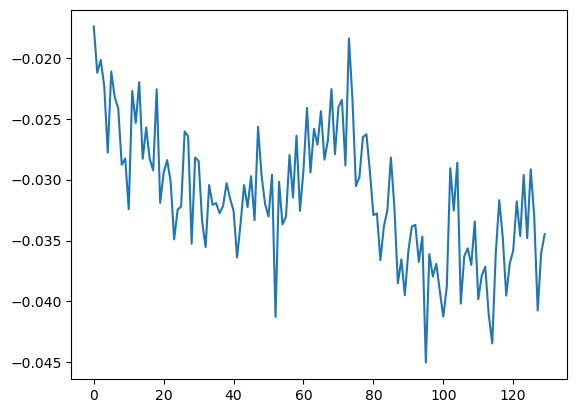

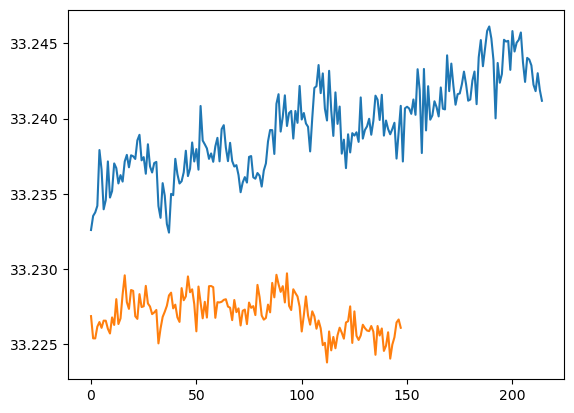

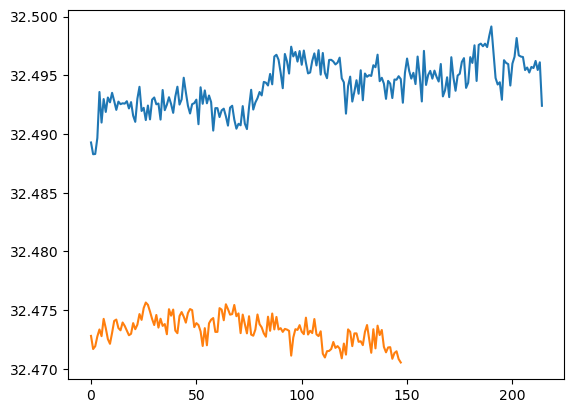

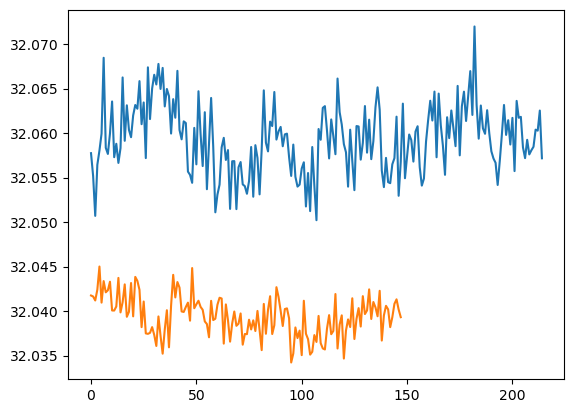

In [201]:
plt.plot(np.mean(np.array(keep_nose_roi_data),axis=0)[:130]-np.mean(np.array(pass_nose_roi_data),axis=0)[:130])
# plt.plot()
plt.show()
plt.plot(np.mean(np.array(pass_forehead_roi_data),axis=0))
plt.plot(np.mean(np.array(keep_forehead_roi_data),axis=0))
plt.show()
plt.plot(np.mean(np.array(pass_left_cheek_roi_data),axis=0))
plt.plot(np.mean(np.array(keep_left_cheek_roi_data),axis=0))
plt.show()
plt.plot(np.mean(np.array(pass_right_cheek_roi_data),axis=0))
plt.plot(np.mean(np.array(keep_right_cheek_roi_data),axis=0))
plt.show()

In [216]:
'''Pass change'''
print(np.mean(np.array(pass_nose_roi_data)[:,-10:]) - np.mean(np.array(pass_nose_roi_data)[:,:10]))
print(np.mean(np.array(pass_forehead_roi_data)[:,-10:]) - np.mean(np.array(pass_forehead_roi_data)[:,:10]))
print(np.mean(np.array(pass_left_cheek_roi_data)[:,-10:]) - np.mean(np.array(pass_left_cheek_roi_data)[:,:10]))
print(np.mean(np.array(pass_right_cheek_roi_data)[:,-10:]) - np.mean(np.array(pass_right_cheek_roi_data)[:,:10]))


# plt.plot(np.mean(np.array(pass_forehead_roi_data),axis=0))
# plt.plot(np.mean(np.array(keep_forehead_roi_data),axis=0))
# plt.show()
# plt.plot(np.mean(np.array(pass_left_cheek_roi_data),axis=0))
# plt.plot(np.mean(np.array(keep_left_cheek_roi_data),axis=0))
# plt.show()
# plt.plot(np.mean(np.array(pass_right_cheek_roi_data),axis=0))
# plt.plot(np.mean(np.array(keep_right_cheek_roi_data),axis=0))
# plt.show()

0.009387857961055346
0.00787869415808018
0.004369186712480655
0.000686827033213433


In [214]:
'''Keep Change'''
print(np.mean(np.array(keep_nose_roi_data)[:,-10:]) - np.mean(np.array(keep_nose_roi_data)[:,:10]))
print(np.mean(np.array(keep_forehead_roi_data)[:,-10:]) - np.mean(np.array(keep_forehead_roi_data)[:,:10]))
print(np.mean(np.array(keep_left_cheek_roi_data)[:,-10:]) - np.mean(np.array(keep_left_cheek_roi_data)[:,:10]))
print(np.mean(np.array(keep_right_cheek_roi_data)[:,-10:]) - np.mean(np.array(keep_right_cheek_roi_data)[:,:10]))

-0.0023629629629695614
-0.0006290123456764718
-0.0012372615039311086
-0.0027943883277217196


In [215]:
print(np.mean(np.array(pass_nose_roi_data)[:,48:58]) - np.mean(np.array(pass_nose_roi_data)[:,:10]))
print(np.mean(np.array(pass_forehead_roi_data)[:,48:58]) - np.mean(np.array(pass_forehead_roi_data)[:,:10]))
print(np.mean(np.array(pass_left_cheek_roi_data)[:,48:58]) - np.mean(np.array(pass_left_cheek_roi_data)[:,:10]))
print(np.mean(np.array(pass_right_cheek_roi_data)[:,48:58]) - np.mean(np.array(pass_right_cheek_roi_data)[:,:10]))

0.005219129438717829
0.0031760595647227774
0.0017075601374543226
0.000860481099650201


In [217]:
print(np.mean(np.array(keep_nose_roi_data)[:,48:58]) - np.mean(np.array(keep_nose_roi_data)[:,:10]))
print(np.mean(np.array(keep_forehead_roi_data)[:,48:58]) - np.mean(np.array(keep_forehead_roi_data)[:,:10]))
print(np.mean(np.array(keep_left_cheek_roi_data)[:,48:58]) - np.mean(np.array(keep_left_cheek_roi_data)[:,:10]))
print(np.mean(np.array(keep_right_cheek_roi_data)[:,48:58]) - np.mean(np.array(keep_right_cheek_roi_data)[:,:10]))

-0.0035297979798016854
0.0016594837261507678
0.0007157126823713611
-0.0020779461279474276


In [218]:
print(np.mean(np.array(pass_nose_roi_data)[:,84]) - np.mean(np.array(pass_nose_roi_data)[:,48]))
print(np.mean(np.array(pass_forehead_roi_data)[:,84]) - np.mean(np.array(pass_forehead_roi_data)[:,48]))
print(np.mean(np.array(pass_left_cheek_roi_data)[:,84]) - np.mean(np.array(pass_left_cheek_roi_data)[:,48]))
print(np.mean(np.array(pass_right_cheek_roi_data)[:,84]) - np.mean(np.array(pass_right_cheek_roi_data)[:,48]))

-0.0006815578465051431
6.98739977096352e-05
0.0015876288659839588
0.0035337915234876505


In [220]:
print(np.mean(np.array(keep_nose_roi_data)[:,84]) - np.mean(np.array(keep_nose_roi_data)[:,48]))
print(np.mean(np.array(keep_forehead_roi_data)[:,84]) - np.mean(np.array(keep_forehead_roi_data)[:,48]))
print(np.mean(np.array(keep_left_cheek_roi_data)[:,84]) - np.mean(np.array(keep_left_cheek_roi_data)[:,48]))
print(np.mean(np.array(keep_right_cheek_roi_data)[:,84]) - np.mean(np.array(keep_right_cheek_roi_data)[:,48]))

-0.0035426487093168646
-0.0010151515151477497
-0.0005578002244632785
-0.004693041526373065


In [221]:
print(np.mean(np.array(pass_nose_roi_data)[:,130]) - np.mean(np.array(pass_nose_roi_data)[:,84]))
print(np.mean(np.array(pass_forehead_roi_data)[:,130]) - np.mean(np.array(pass_forehead_roi_data)[:,84]))
print(np.mean(np.array(pass_left_cheek_roi_data)[:,130]) - np.mean(np.array(pass_left_cheek_roi_data)[:,84]))
print(np.mean(np.array(pass_right_cheek_roi_data)[:,130]) - np.mean(np.array(pass_right_cheek_roi_data)[:,84]))

0.0015028636884295565
0.0007617411225666615
0.0010206185567014359
0.005092783505148191


In [222]:
print(np.mean(np.array(keep_nose_roi_data)[:,130]) - np.mean(np.array(keep_nose_roi_data)[:,84]))
print(np.mean(np.array(keep_forehead_roi_data)[:,130]) - np.mean(np.array(keep_forehead_roi_data)[:,84]))
print(np.mean(np.array(keep_left_cheek_roi_data)[:,130]) - np.mean(np.array(keep_left_cheek_roi_data)[:,84]))
print(np.mean(np.array(keep_right_cheek_roi_data)[:,130]) - np.mean(np.array(keep_right_cheek_roi_data)[:,84]))

0.005426487093153298
-0.0015662177328863436
-0.001295173961842977
-0.0004758698092004465
